# Analysis of the results for the Ximantis dataset
# `ximantis_smooth_3`
## Setup

In [205]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [206]:
timestamp = 1
day_length = 24 * timestamp
train_time = 300
coins = ["BTC", "ETH", "XRP", "BNB", "SOL", "TRX", "DOGE", "BCH", "ADA"]
total_num_coins = len(coins)

## Results

In [207]:
result = torch.tensor(np.load("STGAN/crypto/result/2026-02-18_02-55-52/result.npy"), dtype=torch.float)

In [208]:
result.shape

torch.Size([1382, 9, 3])

In [209]:
coin_num = 0
days = 10

<Axes: >

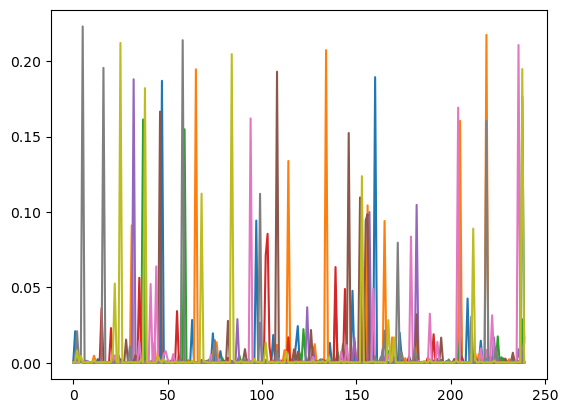

In [210]:
pd.DataFrame(result[:days*day_length, :, 0].numpy()).plot(legend=False)

<Axes: >

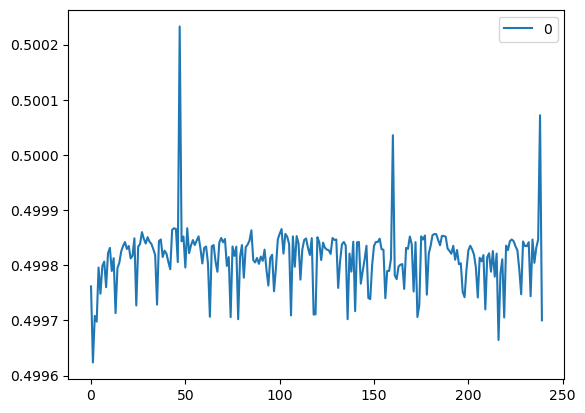

In [211]:
pd.DataFrame(result[:days*day_length, coin_num, 1].numpy()).plot()

<Axes: >

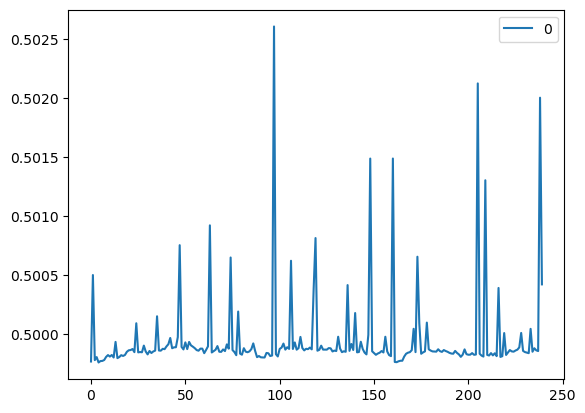

In [212]:
pd.DataFrame(result[:days*day_length, coin_num, 2].numpy()).plot()

## Anomaly scores from all the coins
Combining the two scores, from the generator and the discriminator.

In [213]:
lambda_coef = 1
for coin_num in range(result.shape[1]):
    column_name = "Score Coin " + str(coin_num)
    if coin_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, coin_num, 0].numpy())
    s_D = pd.DataFrame(result[:, coin_num, 1].numpy()) - pd.DataFrame(result[:, coin_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

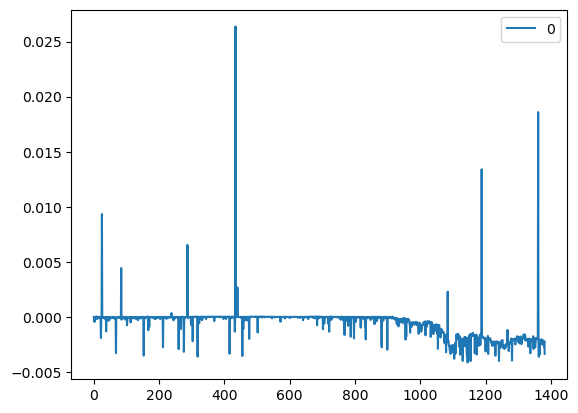

In [214]:
s_D.plot()

<Axes: >

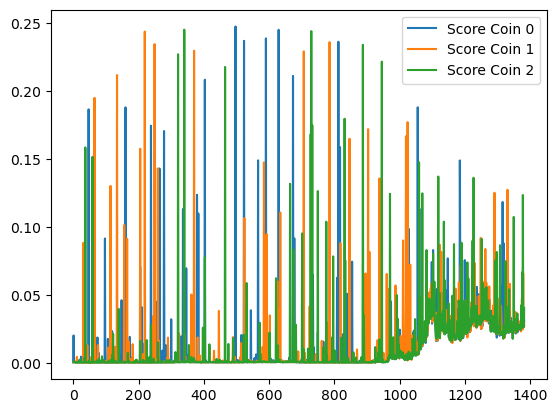

In [215]:
anomaly_score[anomaly_score.columns[:3]].plot()

In [216]:
anomaly_score

,Score Coin 0,Score Coin 1,Score Coin 2,Score Coin 3,Score Coin 4,Score Coin 5,Score Coin 6,Score Coin 7,Score Coin 8
0,0.000278,0.000491,0.000462,0.000492,0.000497,0.000530,0.000322,0.000284,0.000348
1,0.020080,0.000382,0.000413,0.000276,0.000281,0.000291,0.000444,0.000382,0.000408
2,0.000611,0.000609,0.000537,0.000606,0.000289,0.000628,0.000405,0.020107,0.007746
3,0.000978,0.000478,0.000788,0.000427,0.000418,0.000455,0.000514,0.000409,0.000351
4,0.000649,0.000673,0.000595,0.000617,0.000654,0.002660,0.000491,0.000541,0.004388
...,...,...,...,...,...,...,...,...,...
1377,0.031817,0.028852,0.123464,0.028298,0.026731,0.025899,0.027329,0.052294,0.033308
1378,0.026139,0.065863,0.029534,0.038405,0.032108,0.031940,0.026150,0.026524,0.026722
1379,0.026204,0.026265,0.026008,0.027641,0.026554,0.026865,0.026353,0.026458,0.038713
1380,0.039809,0.033225,0.027578,0.027145,0.029094,0.029520,0.030126,0.047055,0.027182


<Axes: >

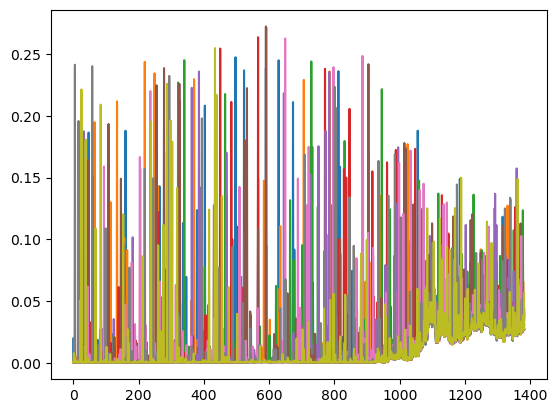

In [217]:
anomaly_score.plot(legend=False)

<Axes: title={'center': 'MSE loss'}>

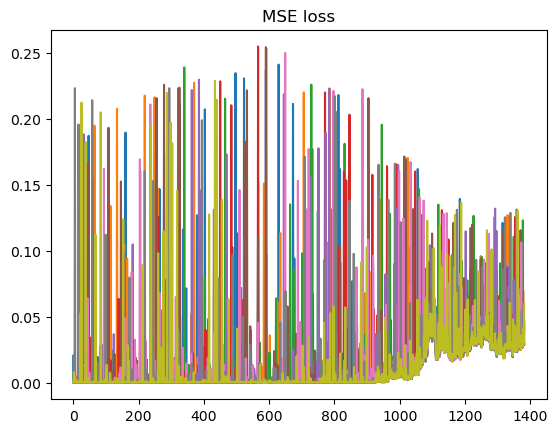

In [218]:
pd.DataFrame(result[:, :, 0].numpy()).plot(legend=False, title="MSE loss")

<Axes: title={'center': 'Real score'}>

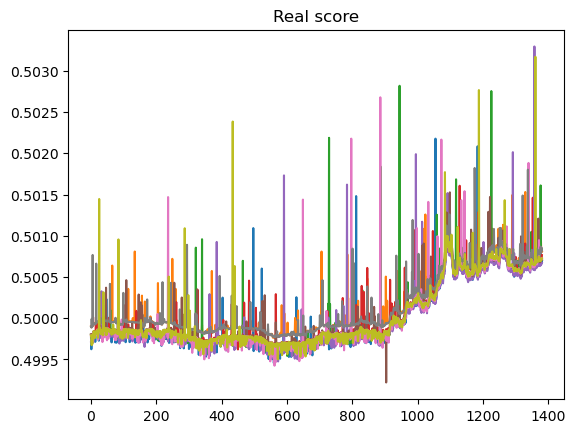

In [219]:
pd.DataFrame(result[:, :, 1].numpy()).plot(legend=False, title="Real score")

<Axes: title={'center': 'Fake score'}>

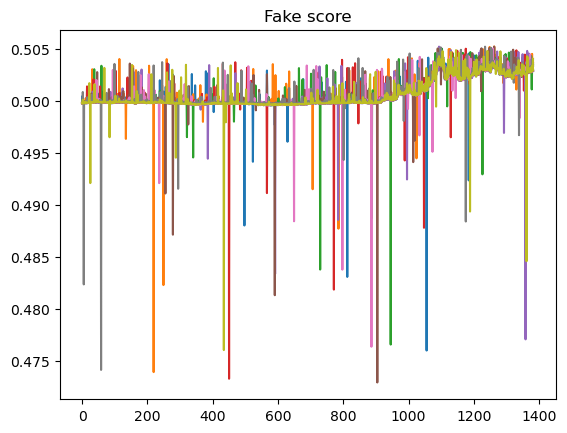

In [220]:
pd.DataFrame(result[:, :, 2].numpy()).plot(legend=False, title="Fake score")

## Selecting the top K% anomaly scores

In [221]:
K = 0.001

In [222]:
# Step 1: Flatten the DataFrame to get all values in a single array
flat_anomaly_score = anomaly_score.values.flatten()

# Step 2: Get the original coordinates
coordinates = [(i, j) for i in range(anomaly_score.shape[0]) for j in range(anomaly_score.shape[1])]

# Step 3: Sort the array while keeping track of the original coordinates
sorted_indices = np.argsort(flat_anomaly_score)[::-1]
sorted_coordinates = [coordinates[i] for i in sorted_indices]

# Print sorted coordinates
# for coord in sorted_coordinates:
#     print(coord)
#     print(anomaly_score.iloc[coord])

In [223]:
sorted_coordinates[:20]

[(590, 5),
 (591, 4),
 (566, 3),
 (649, 6),
 (434, 8),
 (450, 3),
 (886, 6),
 (497, 0),
 (340, 2),
 (629, 0),
 (729, 2),
 (219, 1),
 (904, 5),
 (5, 7),
 (58, 7),
 (797, 6),
 (590, 0),
 (278, 5),
 (771, 3),
 (523, 0)]

In [224]:
pd.Series([x[0] for x in sorted_coordinates[:20]]).nunique()

19

In [225]:
len(sorted_coordinates)

12438

<Axes: >

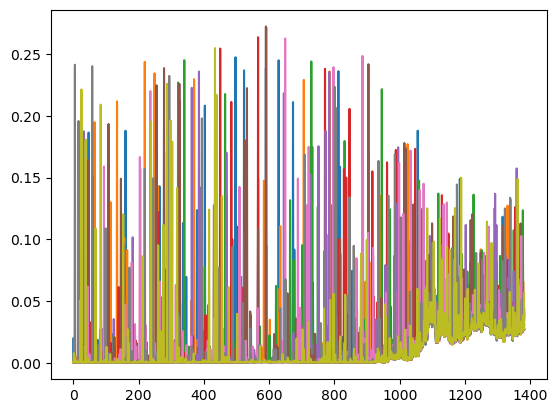

In [226]:
anomaly_score.plot(legend=False)

<Axes: >

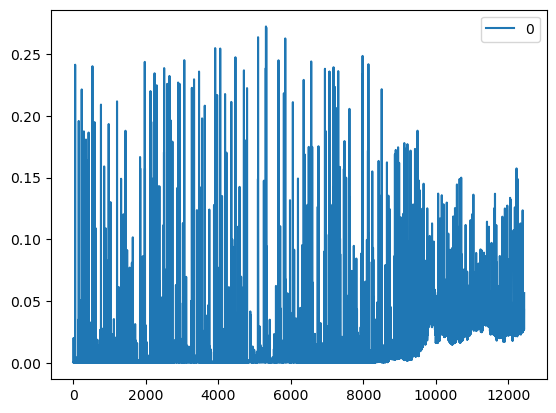

In [227]:
pd.DataFrame(flat_anomaly_score).plot()

In [228]:
head = int(np.floor(K * len(flat_anomaly_score)))

In [229]:
anomalies = sorted_coordinates[:head]
anomalies

[(590, 5),
 (591, 4),
 (566, 3),
 (649, 6),
 (434, 8),
 (450, 3),
 (886, 6),
 (497, 0),
 (340, 2),
 (629, 0),
 (729, 2),
 (219, 1)]

In [230]:
minutes = pd.Series([minutes for minutes, coin_nums in anomalies])
coin_nums = pd.Series([coin_nums for minutes, coin_nums in anomalies])

In [231]:
minutes

0     590
1     591
2     566
3     649
4     434
5     450
6     886
7     497
8     340
9     629
10    729
11    219
dtype: int64

In [232]:
coin_nums

0     5
1     4
2     3
3     6
4     8
5     3
6     6
7     0
8     2
9     0
10    2
11    1
dtype: int64

In [233]:
assert(len(coins) == total_num_coins)
coins

['BTC', 'ETH', 'XRP', 'BNB', 'SOL', 'TRX', 'DOGE', 'BCH', 'ADA']

In [234]:
day_tmp, tmp = divmod(minutes*int(60/timestamp), 60*24)
days = day_tmp + 1
clock_hour, clock_min = divmod(tmp, 60)

for i, day in enumerate(days):
    print(f"Anomaly at: Coin {coins[coin_nums[i]]}, day #{day} of test, at {clock_hour[i]}:{clock_min[i]}.")

Anomaly at: Coin TRX, day #25 of test, at 14:0.
Anomaly at: Coin SOL, day #25 of test, at 15:0.
Anomaly at: Coin BNB, day #24 of test, at 14:0.
Anomaly at: Coin DOGE, day #28 of test, at 1:0.
Anomaly at: Coin ADA, day #19 of test, at 2:0.
Anomaly at: Coin BNB, day #19 of test, at 18:0.
Anomaly at: Coin DOGE, day #37 of test, at 22:0.
Anomaly at: Coin BTC, day #21 of test, at 17:0.
Anomaly at: Coin XRP, day #15 of test, at 4:0.
Anomaly at: Coin BTC, day #27 of test, at 5:0.
Anomaly at: Coin XRP, day #31 of test, at 9:0.
Anomaly at: Coin ETH, day #10 of test, at 3:0.


## Plotting the anomalies for a specific camera

In [235]:
# Choose the coin
coin_num = 0

In [236]:
minutes[coin_nums == coin_num]

7    497
9    629
dtype: int64

In [237]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/crypto/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, coin_num, 0, 0])
df.columns = ["Adj Close"]

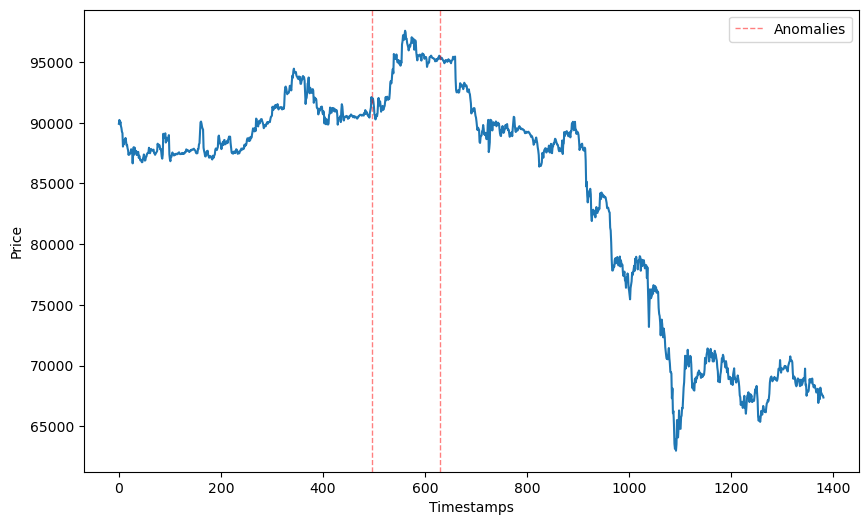

In [238]:
plt.figure(figsize=(10, 6))
plt.plot(df["Adj Close"])

for i, time in enumerate(minutes[coin_nums == coin_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Price")
# plt.ylim([0,1])
plt.legend()
plt.show()